# **PREDICTION OF PARKINSON'S DISEASE**

## **Objective**

To predict whether a patient has Parkinson’s Disease or not

## **Context**
The dataset contains data collected from patients suspected of having parkinsons disease. 65 symptoms were collected from the 5874 patients which determined whether or not an individual had Parkinsons.

## **Success Criteria**

Creation of a model through deep learning that successfully predicts the likelihood of a human contracting Parkinson’s disease with at least a 90% accuracy.

Deployment of the model on a platform that can be used by neurologists.


## **Importing Libraries**

In [1]:
#Reading libraries
import pandas as pd
import numpy as np
#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
#Data preparation libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modelling libraries
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
#Measure libraries
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## **Load the dataset**

In [2]:
url="https://drive.google.com/file/d/1yDJPqLEFLLcTDPtIpOiGRoZB2a77iFTg/view?usp=sharing"
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url2, header=1)
df.head()

,Unnamed: 0,Gender,Unnamed: 2,Unnamed: 3,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Unnamed: 64
0,72.0,F,No,Yes,56,2,No,No,No,No,...,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0,No
1,72.0,F,No,Yes,67,1,No,No,No,No,...,295.0,264.0,40.56,26.88,-0.825,-23.26,4.0,21.77,313.0,No
2,72.0,M,No,Yes,67,1,No,No,No,No,...,280.0,317.0,48.97,22.37,-0.955,-13.29,4.0,22.52,201.0,No
3,72.0,M,No,Yes,73,2,No,No,No,No,...,397.0,800.0,18.69,49.37,0.791,-25.08,2.0,14.37,151.0,No
4,72.0,M,No,Yes,60,0.7,No,No,No,No,...,206.0,480.0,33.54,26.87,0.075,-22.32,5.0,14.61,151.0,No


In [3]:
# Checking the shape
df.shape

(5874, 65)

In [4]:
#checking columns
df.columns

Index(['Unnamed: 0', 'Gender', 'Unnamed: 2', 'Unnamed: 3',
       'Age of disease onset (years)',
       'Duration of disease from first symptoms (years)',
       'Antidepressant therapy', 'Antiparkinsonian medication',
       'Antipsychotic medication', 'Benzodiazepine medication',
       'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)',
       'Hoehn & Yahr scale (-)', 'UPDRS III total (-)', '18. Speech',
       '19. Facial Expression', '20. Tremor at Rest - head',
       '20. Tremor at Rest - RUE', '20. Tremor at Rest - LUE',
       '20. Tremor at Rest - RLE', '20. Tremor at Rest - LLE',
       '21. Action or Postural Tremor - RUE',
       '21. Action or Postural Tremor - LUE', '22. Rigidity - neck',
       '22. Rigidity - RUE', '22. Rigidity - LUE', '22. Rigidity - RLE',
       '22. Rigidity - LLE', '23.Finger Taps - RUE', '23.Finger Taps - LUE',
       '24. Hand Movements  - RUE', '24. Hand Movements  - LUE',
       '25. Rapid Alternating Movements - RUE',
       '25. Rapid A

In [5]:
#Checking the data types
df.dtypes

Unnamed: 0                                       float64
Gender                                            object
Unnamed: 2                                        object
Unnamed: 3                                        object
Age of disease onset (years)                      object
                                                  ...   
Relative loudness of respiration (dB).1          float64
Pause intervals per respiration (-).1            float64
Rate of speech respiration           (- /min)    float64
Latency of\nrespiratory exchange (ms).1          float64
Unnamed: 64                                       object
Length: 65, dtype: object

## **Data Cleaning**

### **Correcting  columns names**

In [6]:
# Renaming unnamed columns
df.rename(columns={'Unnamed: 0' : 'Age',
                   'Unnamed: 2' : 'History',
                   'Unnamed: 3' : 'Tremor', 
                   'Unnamed: 64' : 'Status'}, inplace=True)


In [7]:
# User defined Function for renaming
def replacer(df):
  numbers = ['18.', '19.', '20.', '21.', '22.', '23.', '24.', '25.', '26.', '27.', '28.', '29.', '30.', '31.']
  for i in numbers:
    df.columns = df.columns.str.replace(i, '')
  return df.columns

In [8]:
# Using the function to rename
replacer(df)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_10196/3690604582.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(i, '')


Index(['Age', 'Gender', 'History', 'Tremor', 'Age of disease onset (years)',
       'Duration of disease from first symptoms (years)',
       'Antidepressant therapy', 'Antiparkinsonian medication',
       'Antipsychotic medication', 'Benzodiazepine medication',
       'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)',
       'Hoehn & Yahr scale (-)', 'UPDRS III total (-)', ' Speech',
       ' Facial Expression', ' Tremor at Rest - head', ' Tremor at Rest - RUE',
       ' Tremor at Rest - LUE', ' Tremor at Rest - RLE',
       ' Tremor at Rest - LLE', ' Action or Postural Tremor - RUE',
       ' Action or Postural Tremor - LUE', ' Rigidity - neck',
       ' Rigidity - RUE', ' Rigidity - LUE', ' Rigidity - RLE',
       ' Rigidity - LLE', 'Finger Taps - RUE', 'Finger Taps - LUE',
       ' Hand Movements  - RUE', ' Hand Movements  - LUE',
       ' Rapid Alternating Movements - RUE',
       ' Rapid Alternating Movements -  LUE', 'Leg agility',
       '  Arising from Chair ', ' Posture',

In [9]:
#Removing unwanted spaces on column names
df.columns = df.columns.str.strip().str.replace('  ','')
df.columns

Index(['Age', 'Gender', 'History', 'Tremor', 'Age of disease onset (years)',
       'Duration of disease from first symptoms (years)',
       'Antidepressant therapy', 'Antiparkinsonian medication',
       'Antipsychotic medication', 'Benzodiazepine medication',
       'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)',
       'Hoehn & Yahr scale (-)', 'UPDRS III total (-)', 'Speech',
       'Facial Expression', 'Tremor at Rest - head', 'Tremor at Rest - RUE',
       'Tremor at Rest - LUE', 'Tremor at Rest - RLE', 'Tremor at Rest - LLE',
       'Action or Postural Tremor - RUE', 'Action or Postural Tremor - LUE',
       'Rigidity - neck', 'Rigidity - RUE', 'Rigidity - LUE', 'Rigidity - RLE',
       'Rigidity - LLE', 'Finger Taps - RUE', 'Finger Taps - LUE',
       'Hand Movements- RUE', 'Hand Movements- LUE',
       'Rapid Alternating Movements - RUE', 'Rapid Alternating Movements -LUE',
       'Leg agility', 'Arising from Chair', 'Posture', 'Gait',
       'Postural Stability', 'Bod

### **Checking for duplicates**

In [10]:
# Check duplicates and dropping if any
def drop_dups(df):
  dups = df.duplicated().sum()
  if dups > 0:
    df1 = df.drop_duplicates(inplace=True)
    dup=df.duplicated().sum()
    return dup

In [11]:
drop_dups(df)

0

In [12]:
df.shape

(3765, 65)

### **Missing Values**

In [13]:
# Changing values with '-' to NaN
df = df.replace('-', np.NaN)

In [14]:
# Changing values with '?' to NaN
df= df.replace('?', np.NaN)

In [15]:
# Function that displays percentages of missing values
def null_per(dataframe):
  missing = (dataframe.isnull().sum() / len(dataframe) * 100)
  #dataframe
  missing_df = pd.DataFrame({'Percent missing' : missing}, index=dataframe.columns)
  return missing_df.transpose()

In [16]:
null_per(df)

,Age,Gender,History,Tremor,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
Percent missing,0.053121,0.079681,0.053121,0.053121,97.875166,97.875166,0.849934,0.849934,0.849934,0.849934,...,11.87251,11.87251,11.87251,11.87251,11.87251,11.87251,11.87251,21.88579,21.88579,0.0


Columns dropped includes : 
- Age of Disease onset
- Duration of Disease
- Hoehn and Yahr scale (Overview of motor examination)
- From speech column to Rapid Alternative Movements column

In [17]:
# Dropping columns with missing values > 97%
df.drop(['Age of disease onset (years)', 'Duration of disease from first symptoms (years)', 'Hoehn & Yahr scale (-)', 'UPDRS III total (-)',], axis=1, inplace=True)
df

,Age,Gender,History,Tremor,Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),...,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
0,72.0,F,No,Yes,No,No,No,No,0.0,0.0,...,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0,No
1,72.0,F,No,Yes,No,No,No,No,0.0,0.0,...,295.0,264.0,40.56,26.88,-0.825,-23.26,4.0,21.77,313.0,No
2,72.0,M,No,Yes,No,No,No,No,0.0,0.0,...,280.0,317.0,48.97,22.37,-0.955,-13.29,4.0,22.52,201.0,No
3,72.0,M,No,Yes,No,No,No,No,0.0,0.0,...,397.0,800.0,18.69,49.37,0.791,-25.08,2.0,14.37,151.0,No
4,72.0,M,No,Yes,No,No,No,No,0.0,0.0,...,206.0,480.0,33.54,26.87,0.075,-22.32,5.0,14.61,151.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,85.0,F,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
5418,85.0,M,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
5473,85.0,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
5516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [18]:
# Dropping the rest using loc
df.drop(df.iloc[:, 10:30], axis=1, inplace=True)

In [19]:
null_per(df)

,Age,Gender,History,Tremor,Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),...,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
Percent missing,0.053121,0.079681,0.053121,0.053121,0.849934,0.849934,0.849934,0.849934,2.124834,2.124834,...,11.87251,11.87251,11.87251,11.87251,11.87251,11.87251,11.87251,21.88579,21.88579,0.0


In [20]:
# Prev shape
df.shape

(3765, 41)

In [21]:
# Drop records that contain less than 90% observations
df.dropna(thresh=37, inplace=True)

In [22]:
df.shape

(3318, 41)

In [23]:
null_per(df)

,Age,Gender,History,Tremor,Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),...,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
Percent missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.362266,11.362266,0.0


In [24]:
# Mean of rate of speech for people with parkinsons vs without

df.groupby('Status')['Rate of speech respiration (- /min)'].mean()

Status
No     141.987680
Yes    232.569184
Name: Rate of speech respiration (- /min), dtype: float64

In [25]:
if df['Status'].any() == 'No': 
  df['Rate of speech respiration (- /min)'] = df['Rate of speech respiration (- /min)'].fillna(141.987680)
else :
  df['Rate of speech respiration (- /min)'] = df['Rate of speech respiration (- /min)'].fillna(232.569184)

In [26]:
## Mean of rate of speech for people with parkinsons vs without

df.groupby('Status')['Latency of\nrespiratory exchange (ms).1'].mean()

Status
No     519.683320
Yes    789.400127
Name: Latency of\nrespiratory exchange (ms).1, dtype: float64

In [27]:
if df['Status'].any() == 'No': 
  df['Latency of\nrespiratory exchange (ms).1'] = df['Latency of\nrespiratory exchange (ms).1'].fillna(519.683320)
else :
  df['Latency of\nrespiratory exchange (ms).1'] = df['Latency of\nrespiratory exchange (ms).1'].fillna(789.400127)

### **Checking for outliers**

<AxesSubplot:ylabel='Levodopa equivalent (mg/day)'>

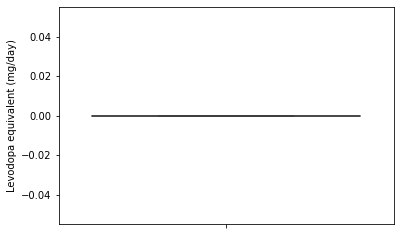

In [28]:
# Check for outliers
sns.boxplot(data=df, y='Levodopa equivalent (mg/day)')

In [29]:
df['Levodopa equivalent (mg/day)'].unique()

array([0.])

In [30]:
# There is no value, therefore will drop
df.drop(['Levodopa equivalent (mg/day)'], inplace=True, axis=1 )

<AxesSubplot:ylabel='Clonazepam (mg/day)'>

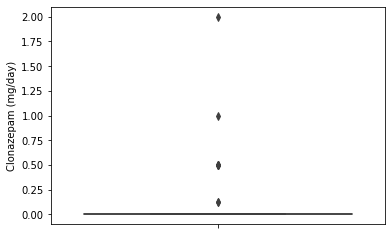

In [31]:
# Check for outliers
sns.boxplot(data=df, y='Clonazepam (mg/day)')

In [32]:
df['Clonazepam (mg/day)'].value_counts()

0.000    3309
0.500       5
0.125       2
1.000       1
2.000       1
Name: Clonazepam (mg/day), dtype: int64

The outliers will not be dropped as they are treated as legit data points

<AxesSubplot:ylabel='Duration of unvoiced stops (ms)'>

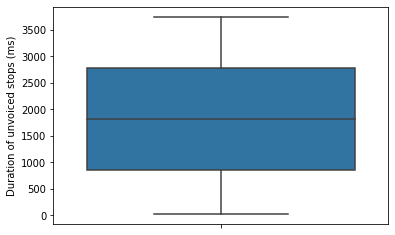

In [33]:
# Any more ?
sns.boxplot(data=df, y='Duration of unvoiced stops (ms)')

No more outliers.

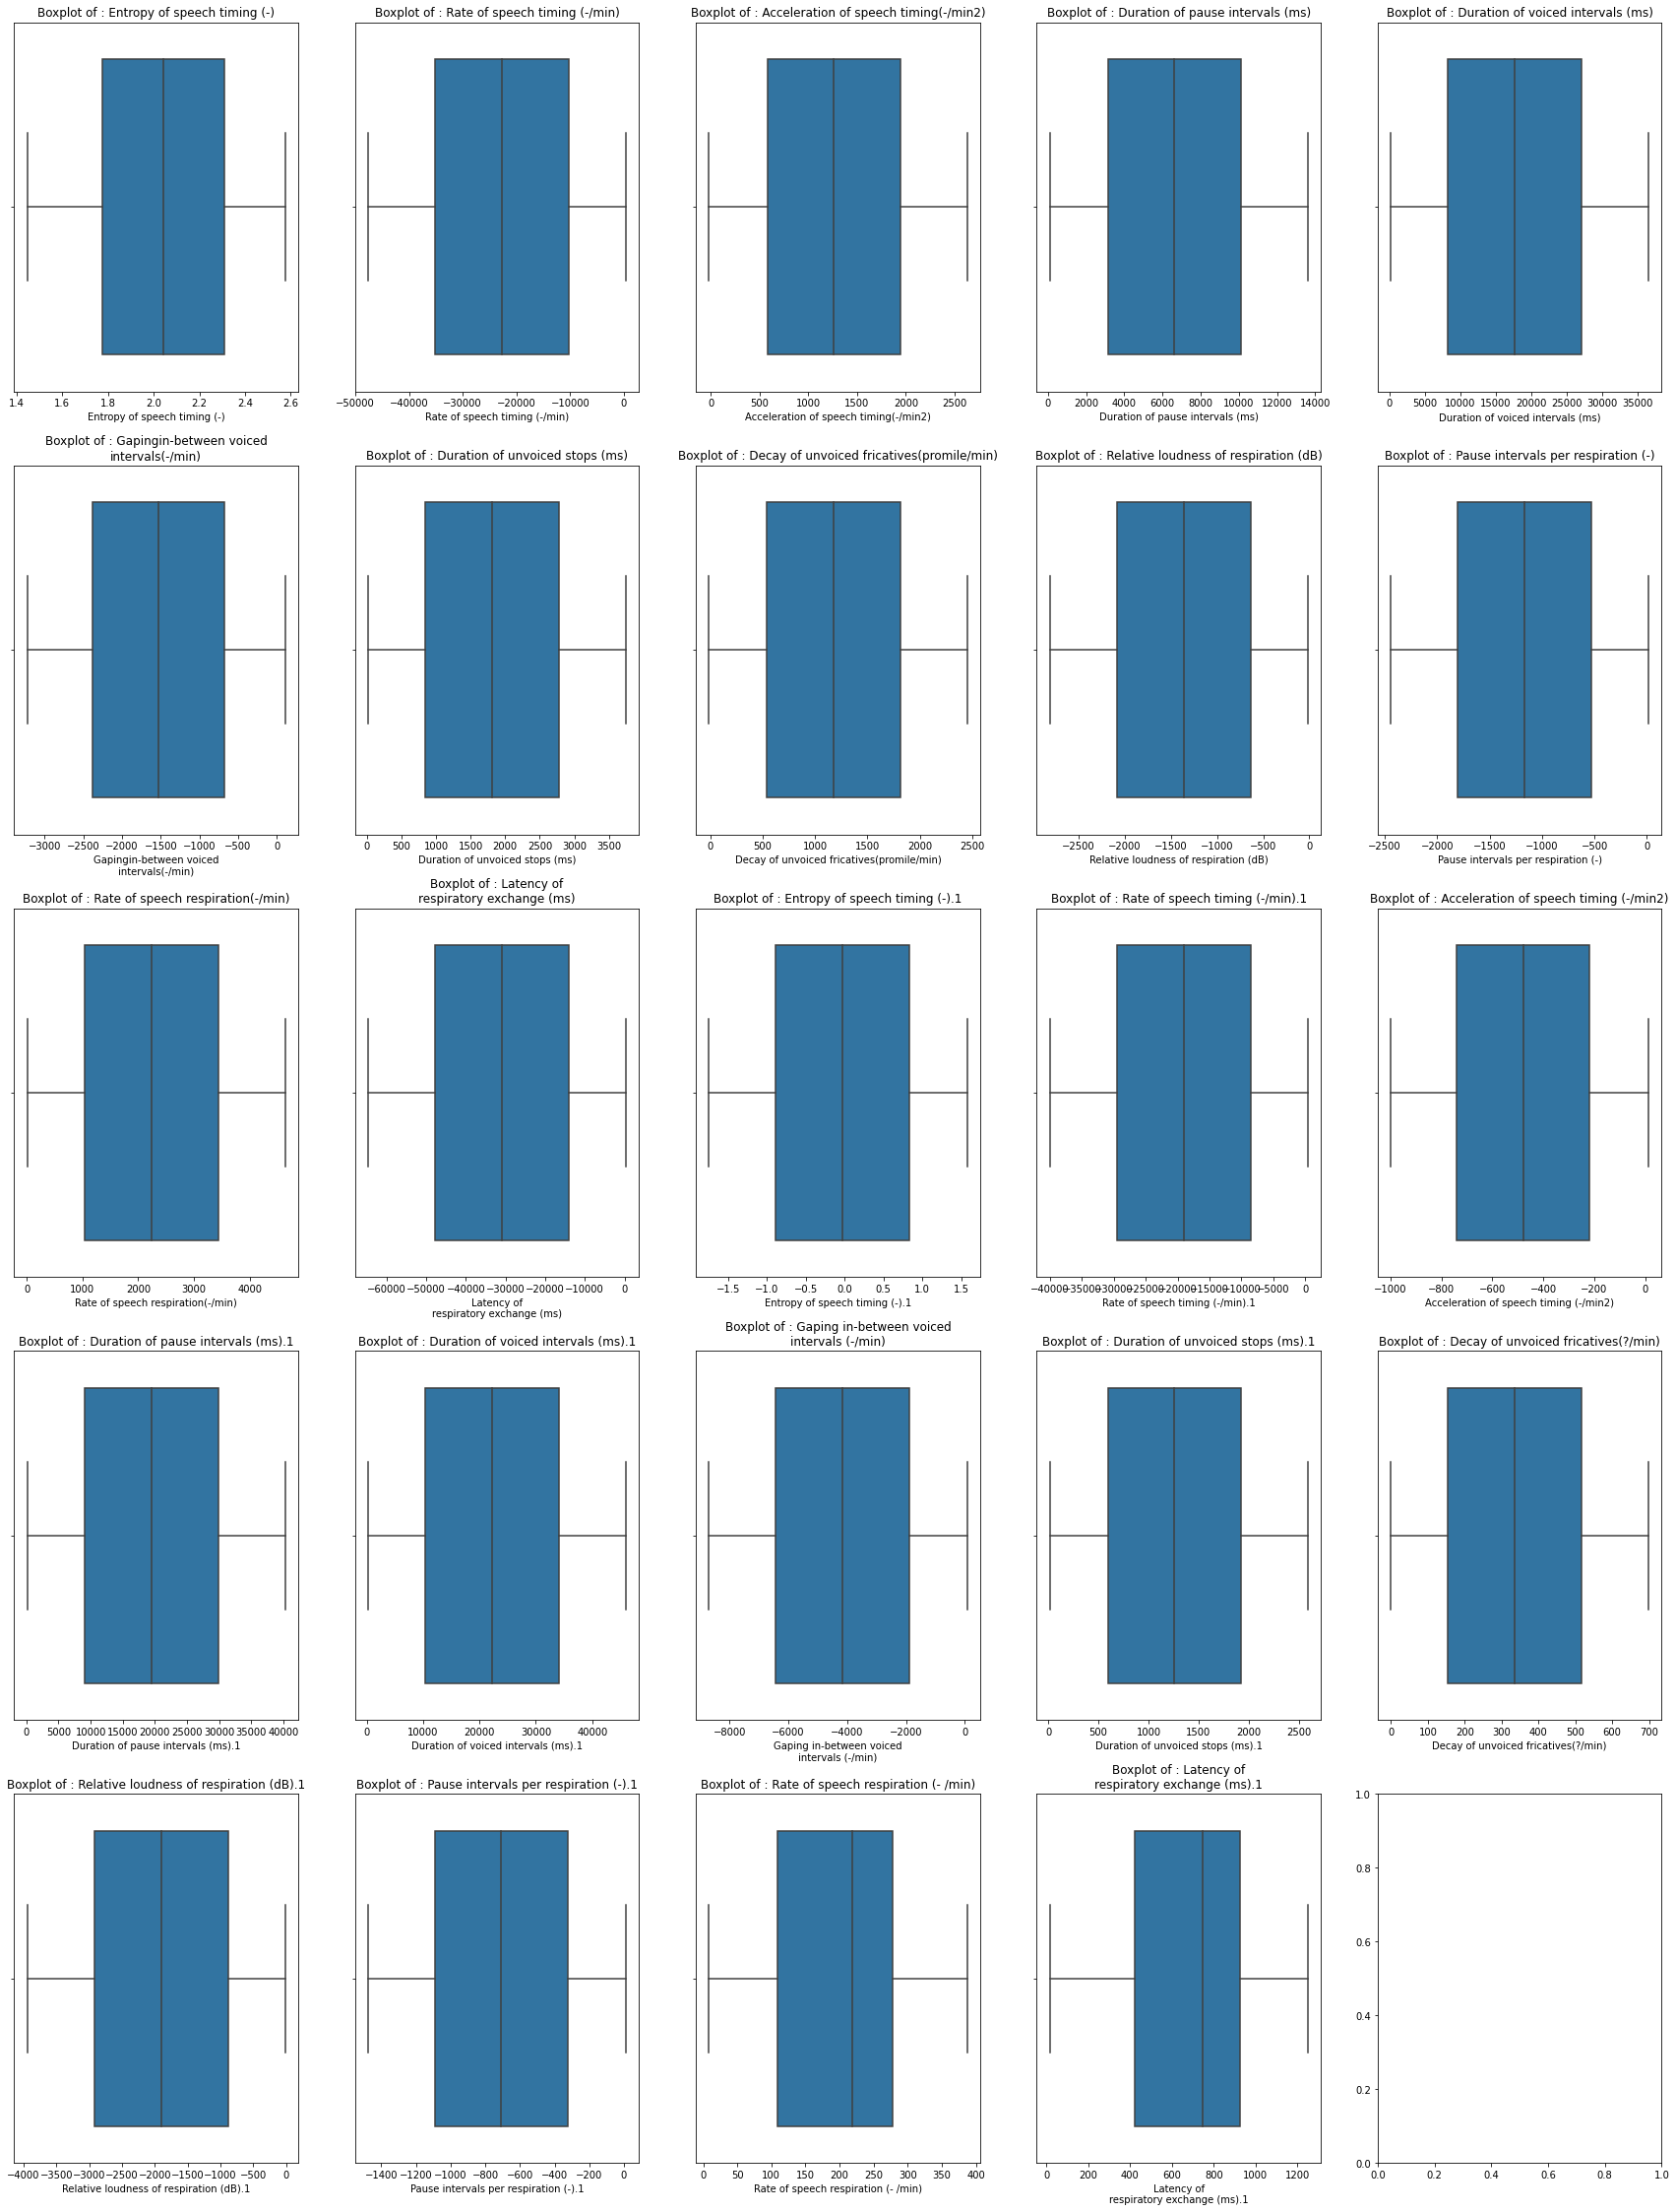

In [34]:
cols = df.iloc[:, 15:39]
cols2 = cols.columns
cols2

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30, 40))

for ax, data, name in zip(axes.flatten(), df, cols2):
  sns.boxplot(data = df, x=name, ax=ax)
  ax.set_title('Boxplot of : '+name)

plt.show()


There are no more outliers

In [35]:
# Output to new csv
df.to_csv('Clean Parkinsons.csv')

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [36]:
df_eda = pd.read_csv('/content/Clean Parkinsons.csv')
df_eda.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Clean Parkinsons.csv'

In [ ]:
# Drop redundant column
df_eda.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Get statistical info on features with discrete variables

df_eda.select_dtypes('float64').describe()

,Age,Clonazepam (mg/day),Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing(-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gapingin-between voiced\nintervals(-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives(promile/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration(-/min),Latency of\nrespiratory exchange (ms),Entropy of speech timing (-).1,Rate of speech timing (-/min).1,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000
mean,64.703737,0.001733,2.043959,-22752.137411,1264.751923,6636.631749,17728.060794,-1527.668965,1818.535692,1177.098496,-1365.013312,-1172.161995,2240.772139,-31022.718204,-0.030034,-19114.060579,-479.041504,19506.341557,22313.133320,-4159.403284,1261.491710,336.429171,-1908.229874,-708.069620,187.988233,656.655237
std,6.552581,0.043482,0.306628,14344.063406,785.319208,4020.512790,10835.327295,978.352941,1112.303536,732.935555,833.812668,732.475812,1383.405284,19414.783586,0.987807,12061.015509,299.711724,11991.862702,13663.213356,2613.566944,766.920513,209.001531,1174.345333,442.919269,106.018845,316.682111
min,55.000000,0.000000,1.446000,-47652.678570,-20.320000,96.000000,197.000000,-3225.473571,17.880000,-12.591000,-2812.373214,-2443.767857,5.220000,-64732.357140,-1.745107,-40051.642860,-999.454286,117.000000,211.000000,-8696.474643,13.370000,-1.417000,-3946.938929,-1476.964286,8.210000,15.000000
25%,58.000000,0.000000,1.776616,-35184.312500,579.082054,3131.839286,8283.196429,-2375.492321,848.684018,538.092045,-2087.667947,-1807.022322,1034.426518,-47851.196425,-0.886241,-29567.553575,-738.832857,9050.428571,10402.973217,-6424.625803,592.881339,154.241554,-2926.072946,-1091.955357,109.036875,422.205357
50%,65.000000,0.000000,2.043161,-22715.946430,1262.324821,6626.535714,17701.107140,-1525.511071,1815.648750,1175.222589,-1362.962679,-1170.276786,2237.135178,-30970.035715,-0.027375,-19083.464285,-478.211429,19475.285715,22279.017855,-4152.776965,1259.539107,335.906536,-1905.206965,-706.946429,168.636964,599.089286
75%,72.000000,0.000000,2.309705,-10247.580357,1945.567589,10121.232140,27119.017855,-675.529821,2782.613482,1812.353134,-638.257411,-533.531250,3439.843839,-14088.874998,0.831491,-8599.375000,-217.590000,29900.142855,34155.062503,-1880.928125,1926.196875,517.571518,-884.340982,-321.937500,277.920268,924.866071
max,75.000000,2.000000,2.576250,457.000000,2628.810357,13615.928570,36536.928570,109.500000,3749.578214,2449.483679,-15.040000,18.500000,4642.552500,441.000000,1.576000,412.000000,14.640000,40325.000000,46031.107140,74.160000,2592.854643,699.236500,-8.860000,13.500000,387.203571,1250.642857


**Check for normality**


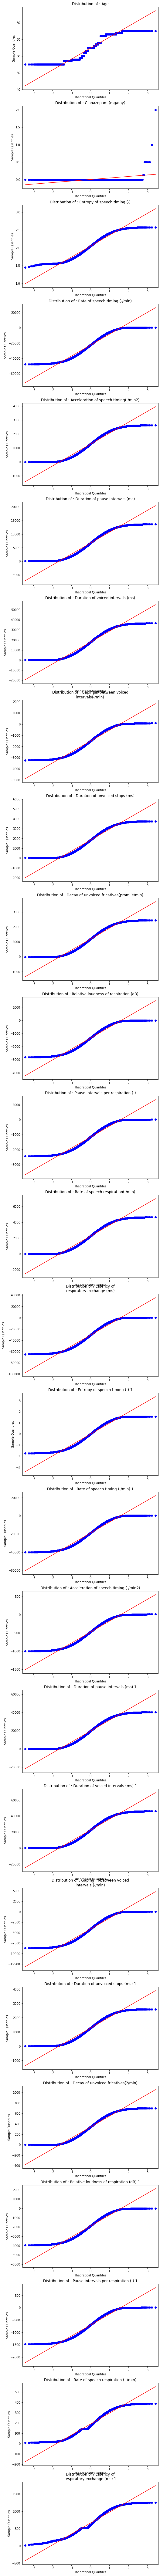

In [ ]:
cols = df_eda.select_dtypes('float64')
cols2 = cols.columns
cols2

fig, axes = plt.subplots(len(cols2), figsize=(8, 155))

for ax, data, name in zip(axes.flatten(), df_eda, cols2):
  qqplot(df_eda[name], line='s', ax=ax)
  ax.set_title('Distribution of : '+name)

plt.show()

The numerical columns are normaly distributed

### **Bivariate Analysis**

In [ ]:
df_eda.head()

,Age,Gender,History,Tremor,Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Clonazepam (mg/day),Leg agility,Arising from Chair,Posture,Gait,Postural Stability,Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing(-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gapingin-between voiced\nintervals(-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives(promile/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration(-/min),Latency of\nrespiratory exchange (ms),Entropy of speech timing (-).1,Rate of speech timing (-/min).1,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
0,72.0,F,No,Yes,No,No,No,No,0.0,No,0,0,0,0,0,1.564,354.0,6.05,146.0,264.0,58.65,31.38,-2.101,-22.47,4.5,21.14,167.0,1.564,333.0,-2.82,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0,No
1,72.0,F,No,Yes,No,No,No,No,0.0,No,0,1,0,1,1,1.564,340.0,27.52,173.0,253.0,48.26,22.38,-1.745,-24.59,7.0,15.28,163.0,1.569,285.0,8.20,295.0,264.0,40.56,26.88,-0.825,-23.26,4.0,21.77,313.0,No
2,72.0,M,No,Yes,No,No,No,No,0.0,No,0,3,0,0,2,1.550,211.0,11.97,377.0,322.0,47.54,38.12,2.657,-16.89,3.0,20.76,372.0,1.550,247.0,4.71,280.0,317.0,48.97,22.37,-0.955,-13.29,4.0,22.52,201.0,No
3,72.0,M,No,Yes,No,No,No,No,0.0,No,0,1,1,0,1,1.519,140.0,-2.49,360.0,663.0,13.72,44.88,-0.934,-25.54,1.0,18.71,119.0,1.539,112.0,-9.09,397.0,800.0,18.69,49.37,0.791,-25.08,2.0,14.37,151.0,No
4,72.0,M,No,Yes,No,No,No,No,0.0,No,1,2,1,1,2,1.543,269.0,6.72,211.0,328.0,42.90,47.12,-0.973,-22.61,5.0,16.26,78.0,1.560,230.0,11.77,206.0,480.0,33.54,26.87,0.075,-22.32,5.0,14.61,151.0,No


In [ ]:
# Function for plotting value counts of the data
def countplot(col):
  df_yes = df_eda[df_eda['Status'] == 'Yes']
  plt.figure(figsize = (10, 10))
  fig = sns.countplot(x=df_yes[col])
  plt.show()
  return fig


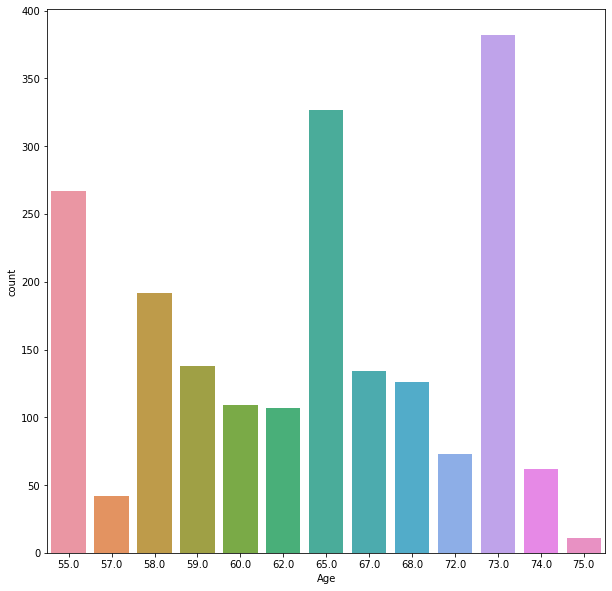

In [ ]:
#Age most affected by the disease
countplot('Age')

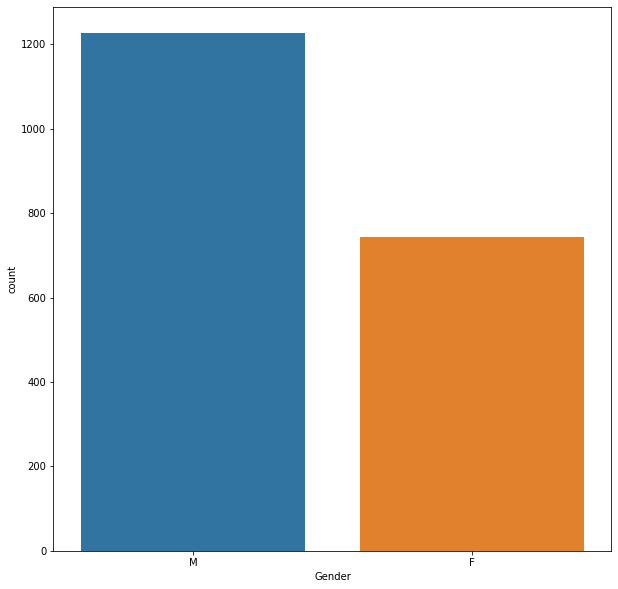

In [ ]:
# Gender Most affected by the disease
countplot('Gender')

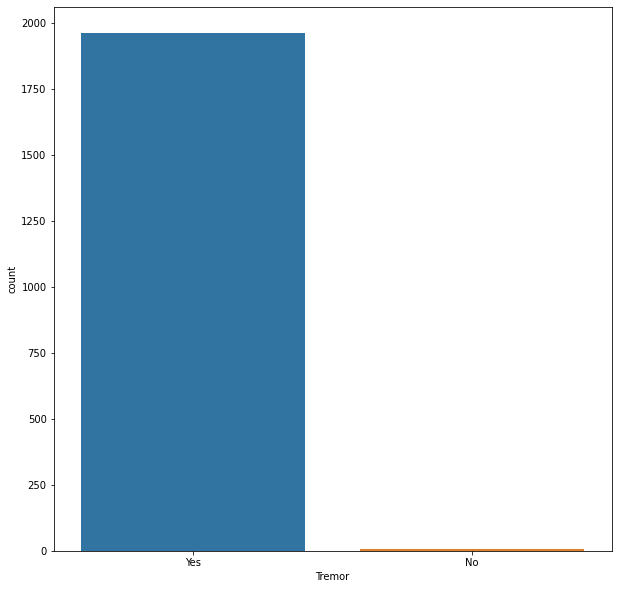

In [ ]:
countplot('Tremor')

## **Data Preparation**

### **Encoding**

In [ ]:
# Label encoding
df_feats = df_eda.select_dtypes('object')
def encoder(df):
  encoderr = LabelEncoder()
  for i in df_feats.columns:
    df[i] = encoderr.fit_transform(df[i])
  return df.head()



In [ ]:
encoder(df_eda)

,Age,Gender,History,Tremor,Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Clonazepam (mg/day),Leg agility,Arising from Chair,Posture,Gait,Postural Stability,Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing(-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gapingin-between voiced\nintervals(-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives(promile/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration(-/min),Latency of\nrespiratory exchange (ms),Entropy of speech timing (-).1,Rate of speech timing (-/min).1,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
0,72.0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,1.564,354.0,6.05,146.0,264.0,58.65,31.38,-2.101,-22.47,4.5,21.14,167.0,1.564,333.0,-2.82,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0,0
1,72.0,0,0,1,0,0,0,0,0.0,0,0,1,0,1,1,1.564,340.0,27.52,173.0,253.0,48.26,22.38,-1.745,-24.59,7.0,15.28,163.0,1.569,285.0,8.20,295.0,264.0,40.56,26.88,-0.825,-23.26,4.0,21.77,313.0,0
2,72.0,1,0,1,0,0,0,0,0.0,0,0,3,0,0,2,1.550,211.0,11.97,377.0,322.0,47.54,38.12,2.657,-16.89,3.0,20.76,372.0,1.550,247.0,4.71,280.0,317.0,48.97,22.37,-0.955,-13.29,4.0,22.52,201.0,0
3,72.0,1,0,1,0,0,0,0,0.0,0,0,1,1,0,1,1.519,140.0,-2.49,360.0,663.0,13.72,44.88,-0.934,-25.54,1.0,18.71,119.0,1.539,112.0,-9.09,397.0,800.0,18.69,49.37,0.791,-25.08,2.0,14.37,151.0,0
4,72.0,1,0,1,0,0,0,0,0.0,0,1,2,1,1,2,1.543,269.0,6.72,211.0,328.0,42.90,47.12,-0.973,-22.61,5.0,16.26,78.0,1.560,230.0,11.77,206.0,480.0,33.54,26.87,0.075,-22.32,5.0,14.61,151.0,0


### **Defining Variables**

In [ ]:
# Specify our features and label
features = df_eda.loc[:, 'Age' : 'Latency of\nrespiratory exchange (ms).1']
label = df_eda['Status']

### **Checking for multicolinearity**

In [ ]:
# Check features with highest correlation
features.corr()

,Age,Gender,History,Tremor,Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Clonazepam (mg/day),Leg agility,Arising from Chair,Posture,Gait,Postural Stability,Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing(-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gapingin-between voiced\nintervals(-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives(promile/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration(-/min),Latency of\nrespiratory exchange (ms),Entropy of speech timing (-).1,Rate of speech timing (-/min).1,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
Age,1.000000,0.012669,-0.190954,-0.050750,0.057785,NaN,NaN,0.063641,0.044392,-0.076236,-0.008325,0.008828,0.014679,0.084904,0.085111,-0.283328,0.283403,-0.283029,-0.283410,-0.283426,0.283609,-0.283355,-0.283379,0.283444,0.283370,-0.283333,0.283278,0.283291,0.283394,0.283240,-0.283359,-0.283420,0.283395,-0.283387,-0.283417,0.283369,0.283394,-0.079622,-0.079913
Gender,0.012669,1.000000,0.000058,0.003241,0.009961,NaN,NaN,-0.001183,-0.001024,-0.011298,0.002378,0.011426,0.003182,0.037088,0.022615,-0.018945,0.018803,-0.018634,-0.018759,-0.018810,0.018758,-0.018767,-0.018816,0.018839,0.018808,-0.018803,0.018779,0.018627,0.018792,0.018723,-0.018756,-0.018808,0.018774,-0.018767,-0.018841,0.018810,0.018778,-0.018467,-0.018350
History,-0.190954,0.000058,1.000000,0.698827,0.021562,NaN,NaN,0.027578,0.028589,0.645128,-0.002179,0.003620,0.006061,0.039347,0.016842,0.528876,-0.528867,0.529229,0.528902,0.528835,-0.528607,0.528903,0.528876,-0.528784,-0.528888,0.528902,-0.528991,-0.528988,-0.528897,-0.529071,0.528938,0.528841,-0.528857,0.528954,0.528839,-0.528878,-0.528884,0.499146,0.497774
Tremor,-0.050750,0.003241,0.698827,1.000000,0.027886,NaN,NaN,0.034405,0.033015,0.926939,-0.004786,0.009923,0.009583,0.063144,0.063297,0.385973,-0.385994,0.386353,0.386081,0.385970,-0.385759,0.386035,0.385995,-0.385900,-0.386010,0.386021,-0.386098,-0.386123,-0.386026,-0.386150,0.386079,0.385982,-0.385985,0.386087,0.385954,-0.385996,-0.386002,0.359016,0.359131
Antidepressant therapy,0.057785,0.009961,0.021562,0.027886,1.000000,NaN,NaN,0.192239,-0.002068,-0.058071,0.013233,0.006835,0.044959,0.129977,0.189525,-0.084615,0.083491,-0.082355,-0.083405,-0.083567,0.084200,-0.083299,-0.083361,0.083590,0.083446,-0.083431,0.083210,0.083545,0.083414,0.083504,-0.083307,-0.083534,0.083483,-0.083293,-0.083491,0.083441,0.083477,-0.083404,-0.083858
Antiparkinsonian medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antipsychotic medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benzodiazepine medication,0.063641,-0.001183,0.027578,0.034405,0.192239,NaN,NaN,1.000000,0.673199,-0.063956,-0.025381,-0.000437,0.041133,0.148612,0.114020,-0.092993,0.092004,-0.091261,-0.092072,-0.092074,0.092888,-0.091760,-0.091891,0.092152,0.091874,-0.091742,0.091656,0.091966,0.091932,0.091850,-0.091916,-0.092047,0.092074,-0.091916,-0.092000,0.091932,0.091935,-0.091717,-0.095009
Clonazepam (mg/day),0.044392,-0.001024,0.028589,0.033015,-0.002068,NaN,NaN,0.673199,1.000000,-0.044612,-0.022838,-0.025668,0.009374,0.080467,0.022805,-0.065125,0.064144,-0.063858,-0.064142,-0.064161,0.064336,-0.064062,-0.064102,0.064274,0.064062,-0.064045,0.063935,0.063886,0.064087,0.063775,-0.064022,-0.06417

In [ ]:
#Checking the variance inflating factors for the independent variables to determine the presence of multicolinearity
def vif(df):
  df_corr = pd.DataFrame()
  df_corr['Column'] = df.columns
  df_corr['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return df_corr

In [ ]:
vif(features)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,Age,1.189111e+02
1,Gender,2.667223e+00
2,History,7.604110e+00
3,Tremor,3.830239e+01
4,Antidepressant therapy,1.381352e+00
5,Antiparkinsonian medication,NaN
6,Antipsychotic medication,NaN
7,Benzodiazepine medication,2.438026e+00
8,Clonazepam (mg/day),2.133056e+00
9,Leg agility,3.409212e+01


In [ ]:
# Some features had Null VIF therefore had no values
features['Antipsychotic medication'].unique()
df_eda.drop(['Antipsychotic medication', 'Antiparkinsonian medication'], axis=1, inplace=True)


In [ ]:
vif(features)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,Age,1.189111e+02
1,Gender,2.667223e+00
2,History,7.604110e+00
3,Tremor,3.830239e+01
4,Antidepressant therapy,1.381352e+00
5,Antiparkinsonian medication,NaN
6,Antipsychotic medication,NaN
7,Benzodiazepine medication,2.438026e+00
8,Clonazepam (mg/day),2.133056e+00
9,Leg agility,3.409212e+01


In [ ]:
# Save the dataset again
df_eda.to_csv('clean_parkinsons_2.csv')

**Loading the modelling dataset**

In [ ]:
df2 = pd.read_csv('/content/clean_parkinsons_2.csv')
df2.drop('Unnamed: 0',axis=1, inplace=True)
df2.head()

,Age,Gender,History,Tremor,Antidepressant therapy,Benzodiazepine medication,Clonazepam (mg/day),Leg agility,Arising from Chair,Posture,Gait,Postural Stability,Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing(-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gapingin-between voiced\nintervals(-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives(promile/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration(-/min),Latency of\nrespiratory exchange (ms),Entropy of speech timing (-).1,Rate of speech timing (-/min).1,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
0,72.0,0,0,1,0,0,0.0,0,0,0,0,0,0,1.564,354.0,6.05,146.0,264.0,58.65,31.38,-2.101,-22.47,4.5,21.14,167.0,1.564,333.0,-2.82,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0,0
1,72.0,0,0,1,0,0,0.0,0,0,1,0,1,1,1.564,340.0,27.52,173.0,253.0,48.26,22.38,-1.745,-24.59,7.0,15.28,163.0,1.569,285.0,8.20,295.0,264.0,40.56,26.88,-0.825,-23.26,4.0,21.77,313.0,0
2,72.0,1,0,1,0,0,0.0,0,0,3,0,0,2,1.550,211.0,11.97,377.0,322.0,47.54,38.12,2.657,-16.89,3.0,20.76,372.0,1.550,247.0,4.71,280.0,317.0,48.97,22.37,-0.955,-13.29,4.0,22.52,201.0,0
3,72.0,1,0,1,0,0,0.0,0,0,1,1,0,1,1.519,140.0,-2.49,360.0,663.0,13.72,44.88,-0.934,-25.54,1.0,18.71,119.0,1.539,112.0,-9.09,397.0,800.0,18.69,49.37,0.791,-25.08,2.0,14.37,151.0,0
4,72.0,1,0,1,0,0,0.0,0,1,2,1,1,2,1.543,269.0,6.72,211.0,328.0,42.90,47.12,-0.973,-22.61,5.0,16.26,78.0,1.560,230.0,11.77,206.0,480.0,33.54,26.87,0.075,-22.32,5.0,14.61,151.0,0


## **Building the Model**

### **Data Preprocessing**

In [ ]:
# Split the dataset using sklearn
X = df2.loc[:, 'Age' : 'Latency of\nrespiratory exchange (ms).1'].values
y = df2['Status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#Scale the features
scaler = MinMaxScaler()
#fitting the x_train
scaler.fit(X_train)
#Transforming the independent variables
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **Feature Reduction**

**1. Feature importance with Random Forest**

---



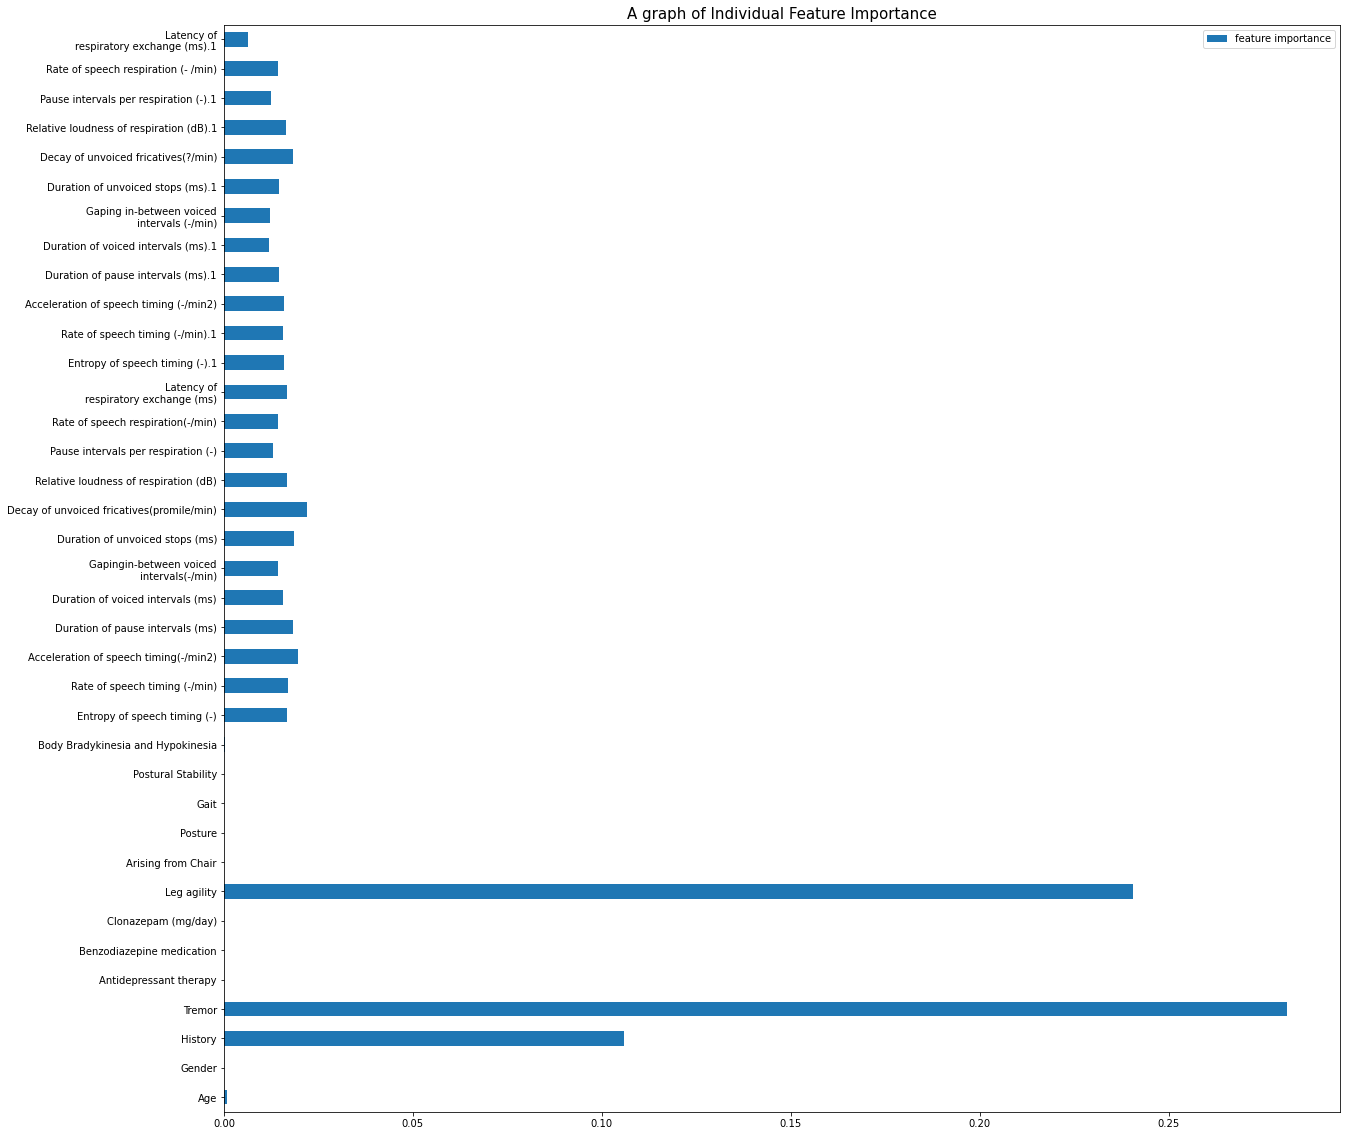

In [ ]:
# Will build a RF model and check feature importance
forest = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_split=30)
forest.fit(X_train, y_train)
#specify feature names
X1 = df2.loc[:, 'Age' : 'Latency of\nrespiratory exchange (ms).1']
df_important = pd.DataFrame(forest.feature_importances_, X1.columns, columns=['feature importance'])
df_important.plot(kind='barh', figsize=(20, 20))
plt.title('A graph of Individual Feature Importance',fontsize=15)
plt.show()

**Sumarry:**leg agility,tremor and family history are among the most important features selected in the random forest sampling. There are a number of features that have not been condsidered. These will be dropped as the aim of randon forest in this case was to help minimise the number features.

In [ ]:
df2.drop(['Gender', 'Antidepressant therapy', 'Benzodiazepine medication', 'Clonazepam (mg/day)', 'Arising from Chair', 'Posture', 'Gait', 'Postural Stability','Body Bradykinesia and Hypokinesia'], axis=1,inplace=True)
df2.head()

,Age,History,Tremor,Leg agility,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing(-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gapingin-between voiced\nintervals(-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives(promile/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration(-/min),Latency of\nrespiratory exchange (ms),Entropy of speech timing (-).1,Rate of speech timing (-/min).1,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives(?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Status
0,72.0,0,1,0,1.564,354.0,6.05,146.0,264.0,58.65,31.38,-2.101,-22.47,4.5,21.14,167.0,1.564,333.0,-2.82,158.0,318.0,49.01,22.37,0.588,-19.77,6.0,13.81,127.0,0
1,72.0,0,1,0,1.564,340.0,27.52,173.0,253.0,48.26,22.38,-1.745,-24.59,7.0,15.28,163.0,1.569,285.0,8.20,295.0,264.0,40.56,26.88,-0.825,-23.26,4.0,21.77,313.0,0
2,72.0,0,1,0,1.550,211.0,11.97,377.0,322.0,47.54,38.12,2.657,-16.89,3.0,20.76,372.0,1.550,247.0,4.71,280.0,317.0,48.97,22.37,-0.955,-13.29,4.0,22.52,201.0,0
3,72.0,0,1,0,1.519,140.0,-2.49,360.0,663.0,13.72,44.88,-0.934,-25.54,1.0,18.71,119.0,1.539,112.0,-9.09,397.0,800.0,18.69,49.37,0.791,-25.08,2.0,14.37,151.0,0
4,72.0,0,1,0,1.543,269.0,6.72,211.0,328.0,42.90,47.12,-0.973,-22.61,5.0,16.26,78.0,1.560,230.0,11.77,206.0,480.0,33.54,26.87,0.075,-22.32,5.0,14.61,151.0,0


**2. Factor Analysis to Reduce Features**

In [ ]:
# pip install factor analyzer
!pip install factor_analyzer==0.2.3

In [ ]:
# Berlett Tests
chi2_value, p_val = calculate_bartlett_sphericity(X1)
print(chi2_value)
print(p_val)


1005100.9165152799
0.0


In [ ]:
# KMO
kmo_all, kmo_model = calculate_kmo(X1)
print(kmo_all)
print('\nKMO of the model is : ', kmo_model)

                                                  KMO
Age                                          0.976020
Gender                                       0.659237
History                                      0.972311
Tremor                                       0.804621
Antidepressant therapy                       0.424362
Benzodiazepine medication                    0.498997
Clonazepam (mg/day)                          0.491863
Leg agility                                  0.869786
Arising from Chair                           0.567766
Posture                                      0.534245
Gait                                         0.622499
Postural Stability                           0.560586
Body Bradykinesia and Hypokinesia            0.579414
Entropy of speech timing (-)                 0.975416
Rate of speech timing (-/min)                0.914301
Acceleration of speech timing(-/min2)        0.978183
Duration of pause intervals (ms)             0.954366
Duration of voiced intervals

In [ ]:
# Factor Analysis
analyzer = FactorAnalyzer()

analyzer.analyze(X1, 37,rotation='varimax')

# Check eigen values
ev, value = analyzer.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.401403e+01
1,2.053894e+00
2,1.824223e+00
3,1.689373e+00
4,1.462509e+00
5,1.050920e+00
6,9.976954e-01
7,9.383463e-01
8,7.373101e-01
9,6.988262e-01


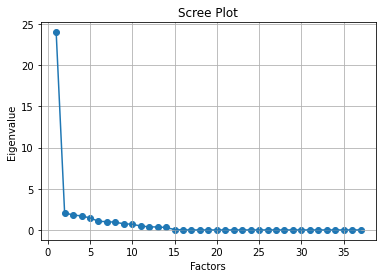

In [ ]:
plt.scatter(range(1,X1.shape[1]+1),ev)
plt.plot(range(1,X1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Getting individual loadings of each feature in the factors with an eigen value that's greater than one
analyzer.analyze(X1, 6,rotation='varimax')
analyzer.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Age,-0.294954,-0.004991,-0.007449,0.037709,0.083679,0.163278
Gender,-0.015630,0.002407,0.003976,-0.005389,0.038451,-0.004889
History,0.454013,0.573231,-0.007982,0.048740,0.068387,0.126379
Tremor,0.262105,0.963906,-0.006723,0.035875,0.109079,0.028173
Antidepressant therapy,-0.061230,0.010530,-0.022076,0.104657,0.219467,-0.015067
Benzodiazepine medication,-0.051916,0.001063,-0.018139,0.989151,0.146438,-0.003850
Clonazepam (mg/day),-0.045282,0.014087,-0.017528,0.667865,0.025621,-0.009931
Leg agility,0.367035,0.859881,0.011079,-0.042431,-0.081011,0.083208
Arising from Chair,0.010473,-0.004897,0.571633,-0.017952,0.028855,0.005000
Posture,0.002945,-0.005400,0.969122,-0.015928,0.202118,0.009607


## **Neural Networks Model with Tensrflow**

### **Data Preparation**

In [ ]:
# Split and Preprocessing
X = df2.loc[:, 'Age' : 'Latency of\nrespiratory exchange (ms).1'].values
y = df2['Status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling using MinMax
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape
                                                    
# Features are 28, therefore are less after doing feature importance

(2654, 28)

### **Model 1:Before Optimization**

In [ ]:
# Building a function to enable adjustment of epochs
def Tensor_flow(x,y,epoch):
  model = Sequential()
  model.add(Dense(28, activation='sigmoid'))
  model.add(Dense(28, activation='sigmoid'))
  model.add(Dense(28, activation='sigmoid'))
  model.add(Dense(28, activation='sigmoid'))
  model.add(Dense(1))
  model.compile(optimizer='rmsprop', loss='BinaryCrossentropy', metrics=['accuracy'])
  model.fit(x=x,y=y,epochs=epoch,verbose=1,validation_split=0.2)
  # Check the loss
  df_loss = pd.DataFrame(model.history.history)
  graph=df_loss.plot(figsize=(12,12))
  return graph

Epoch 1/300
67/67 [==============================] - 1s 4ms/step - loss: 0.8876 - accuracy: 0.4442 - val_loss: 0.6685 - val_accuracy: 0.6102
Epoch 2/300
67/67 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5940 - val_loss: 0.6636 - val_accuracy: 0.6102
Epoch 3/300
67/67 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6147 - val_loss: 0.6077 - val_accuracy: 0.8267
Epoch 4/300
67/67 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7913 - val_loss: 0.4769 - val_accuracy: 0.8136
Epoch 5/300
67/67 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8201 - val_loss: 0.3457 - val_accuracy: 0.8437
Epoch 6/300
67/67 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8601 - val_loss: 0.1969 - val_accuracy: 0.9115
Epoch 7/300
67/67 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9534 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 8/300
6

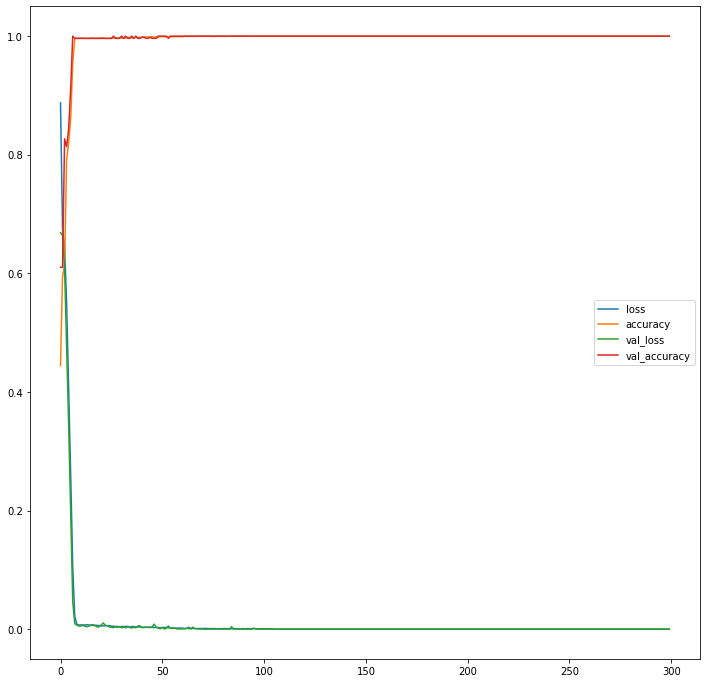

In [ ]:
Tensor_flow(X_train,y_train,300)

**Summary:** With 300 epochs, four hidden layers with 28 neurons each, the model has a validation accuracy of only 40.89%, which is way below the target accuracy.It inturn gave a constant of 100% which was a great sign of over fitting. This model will be optimized with the aim of improving the models perfomance and avoid an instance of overfitting.

### Model 2: Optimized

The model below has been optimizing by hyperparameter tuning (using GrisSearch) the following parameters: batch size, epochs, learning rate, and introducing callbacks.

In [ ]:
# Using hyperparameter tuning to tune batch_size,epochs,learning rate

#Creating a Sequential model
def Tensor_Opt():
  model1 = Sequential()
  model1.add(Dense(28,activation='relu'))
  model1.add(Dense(47,activation='relu'))
  model1.add(Dense(47,activation='relu'))
  model1.add(Dense(28,activation='sigmoid'))
  model1.add(Dense(1))
  model1.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
  return model1
# Using Keras Classifier to wrap the tensor flow model
keras_model=KerasClassifier(build_fn=Tensor_Opt,verbose=1)
# Hyperparameters to tune
batch_size=[100,200]
epochs=[100,150,200,250,300,350,400]
param_grid=dict(batch_size=batch_size,epochs=epochs)
# Using Grid Search 
Tensor_search=GridSearchCV(estimator=keras_model,param_grid=param_grid,n_jobs=-1,cv=5)
early=EarlyStopping(monitor='val_loss',mode='min')
# Fitting the model 
Tensor_search.fit(X_train,y_train,validation_split=0.2,callbacks=[early])
# Obtaining the model and best parameters
our_model=(Tensor_search.best_estimator_)
print(Tensor_search.best_params_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Epoch 1/200
22/22 [==============================] - 1s 10ms/step - loss: 0.5973 - accuracy: 0.5916 - val_loss: 0.4214 - val_accuracy: 0.8060
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.8888 - val_loss: 0.0686 - val_accuracy: 1.0000
{'batch_size': 100, 'epochs': 200}


In [ ]:
Predictions=our_model.predict(X_test)
Predictions
# Plotting predictions against Y_test

cr=classification_report(y_test,Predictions)
ac=accuracy_score(y_test,Predictions)
cm=confusion_matrix(y_test,Predictions)
print(cm,'\n',ac,'\n',cr)

[[273   0]
 [  3 388]] 
 0.9954819277108434 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       273
           1       1.00      0.99      1.00       391

    accuracy                           1.00       664
   macro avg       0.99      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



**Summary:**optimizing the model by tuning parameters improve the model to an accuracy of 99%. Despite the improved accuracy, we suspect a case of overfitting thus we will further tune the model using dropouts on input and hidden layers.

In [ ]:
# our_model.save()

In [ ]:
# Using hyperparameter tuning to tune batch_size,epochs,learning rate
from keras.constraints import maxnorm
from keras.layers import Dropout
#Creating a Sequential model
def Tensor_Opt2():
  model2 = Sequential()
  model2.add(Dense(28,activation='relu'))
  model2.add(Dropout(0.2))
  model2.add(Dense(47,activation='relu'))
  model2.add(Dropout(0.2))
  model2.add(Dense(47,activation='relu'))
  model2.add(Dropout(0.2))
  model2.add(Dense(28,activation='sigmoid'))
  model2.add(Dropout(0.2))
  model2.add(Dense(1))
  model2.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
  return model2
# Using Keras Classifier to wrap the tensor flow model
keras_model1=KerasClassifier(build_fn=Tensor_Opt2,batch_size=100,epochs=200,verbose=1)
# Enhancing Early stopping
early=EarlyStopping(monitor='val_loss',mode='min')
# Fitting the model 
keras_model1.fit(X_train,y_train,validation_split=0.2,callbacks=[early])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/200
22/22 [==============================] - 1s 12ms/step - loss: 2.6495 - accuracy: 0.5054 - val_loss: 0.5247 - val_accuracy: 0.7684
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 1.6153 - accuracy: 0.6227 - val_loss: 0.3910 - val_accuracy: 0.9680


In [ ]:
# Predicting using this model
Preds2=keras_model1.predict(X_test)
Preds2
# Plotting predictions against Y_test
cr1=classification_report(y_test,Preds2)
ac1=accuracy_score(y_test,Preds2)
cm1=confusion_matrix(y_test,Preds2)
print(cm1,'\n',ac1,'\n',cr1)

[[273   0]
 [ 40 351]] 
 0.9397590361445783 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       273
           1       1.00      0.90      0.95       391

    accuracy                           0.94       664
   macro avg       0.94      0.95      0.94       664
weighted avg       0.95      0.94      0.94       664



This model has registered less accuracy but its less overfitted. The recall for both postitves and negatives ois good but we still have 40 inorrectly missclassified inputs. Further optimization is required

## Tunning Using the Keras Tuner

In [ ]:
# Installing the kerastuner to get most out of my model
!pip install -q -U keras-tuner
# Importing the tuner
import keras_tuner as kt
from tensorflow.keras.layers import Flatten
# Building a hypermodel
def hyper_tuner(hp):
  final_model=Sequential()
  # final_model.add(Flatten(input_shape=(None, 784, 28)))
  # Tuning the number of units in the first layer
  # hp_units=hp.Int('units',min_value=32,max_value=520,step=32)
  # final_model.add(Dense(units=hp_units,activation='relu'))
  final_model.add(Dense(units=50,activation='relu'))
  final_model.add(Dense(units=50,activation='relu'))
  final_model.add(Dense(units=28,activation='sigmoid'))
  final_model.add(Dense(1))
  # Tunning the learning rate of the optimizer
  hp_learning_rate=hp.Choice('learning rate',values=[0.01,0.001,0.0001])
  final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return final_model
# # Instantiating the tuner to perform hyperparameter tuning
tuner=kt.Hyperband(hyper_tuner,
                   objective='val_accuracy',
                   max_epochs=100,
                   factor=3)
early_stoping=EarlyStopping(monitor='val_loss',patience=5)
# Running the search
tuner.search(X_train,y_train,epochs=50,validation_split=0.2,callbacks=[early_stoping])
# Getting the best hyperparameters
best_hyperparameters=tuner.get_best_hyperparameters(num_trials=1)[0]
# Getting the best model

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit


## User Interface